In [1]:
pwd

'/ai-data/neuro/workspace/smjung'

In [2]:
cd /ai-data/neuro/data/restored/patch/model_torch_valid

/ai-data/neuro/data/restored/patch/model_torch_valid


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from scipy.ndimage import affine_transform
from scipy.ndimage import rotate
from numpy.linalg import norm
from Aneurysm_Visualization_2 import *

In [12]:
# set the path to the npz file
file_path = 'HHHHH_CA_000062.npz'

# load the npz file
npz_data = np.load(file_path)

# print the keys in the npz file
print("Keys in the npz file:", npz_data.files)

keys_to_print = ['center', 'direction', 'data', 'mask', 'intersection_over_aneurysm']

for key in keys_to_print:
    if key in npz_data:
        shape = npz_data[key].shape
        print(f"Shape of {key}: {shape}")
    else:
        print(f"{key} not found in the npz file.")

Keys in the npz file: ['center', 'direction', 'data', 'mask', 'data_normed', 'data_upscaled', 'mask_upscaled', 'intersection_over_aneurysm']
Shape of center: (348, 3)
Shape of direction: (348, 9)
Shape of data: (348, 32, 32, 32)
Shape of mask: (348, 32, 32, 32)
Shape of intersection_over_aneurysm: (348, 1)


In [13]:
index = 252
data = npz_data['data'][index]
mask = npz_data['mask'][index]
direction = npz_data['direction'][index]
center = npz_data['center'][index]
intersection_over_aneurysm = npz_data['intersection_over_aneurysm'][index]

In [14]:
print("direction : ", direction)
print("center : ", center)
print("intersection_over_aneurysm : ", intersection_over_aneurysm)

direction :  [ 1.00000000e+00  1.18533117e-14 -2.13162821e-14  2.18574607e-14
 -4.77036791e-02  9.98861531e-01  1.08229520e-14 -9.98861531e-01
 -4.77036791e-02]
center :  [-38.4984     -36.82375418 -27.1373649 ]
intersection_over_aneurysm :  [1.]


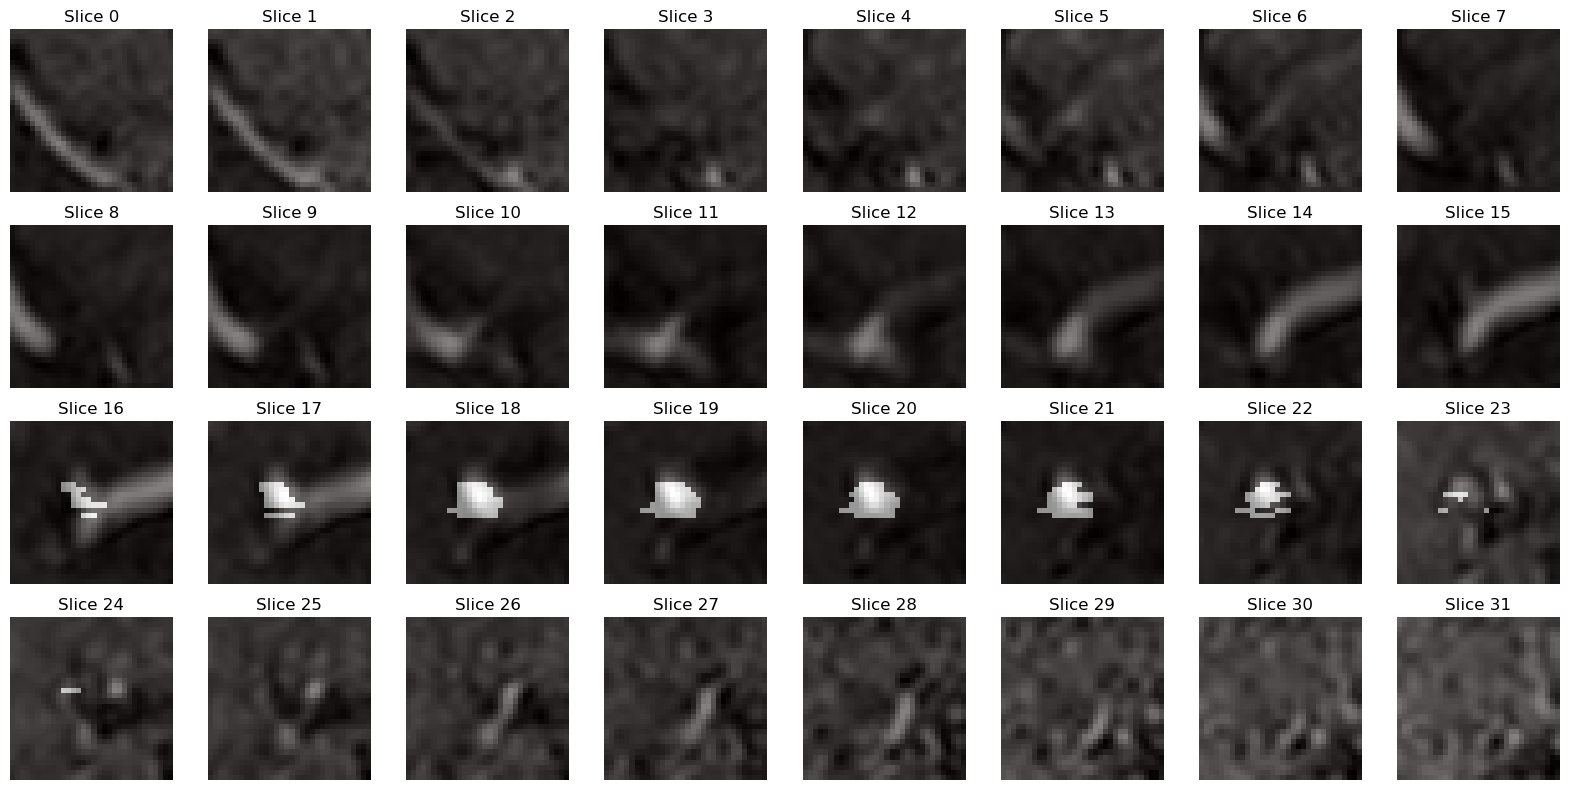

In [5]:
visualizer = SliceVisualizer(data, mask)
visualizer.show_slices(with_overlay=True)

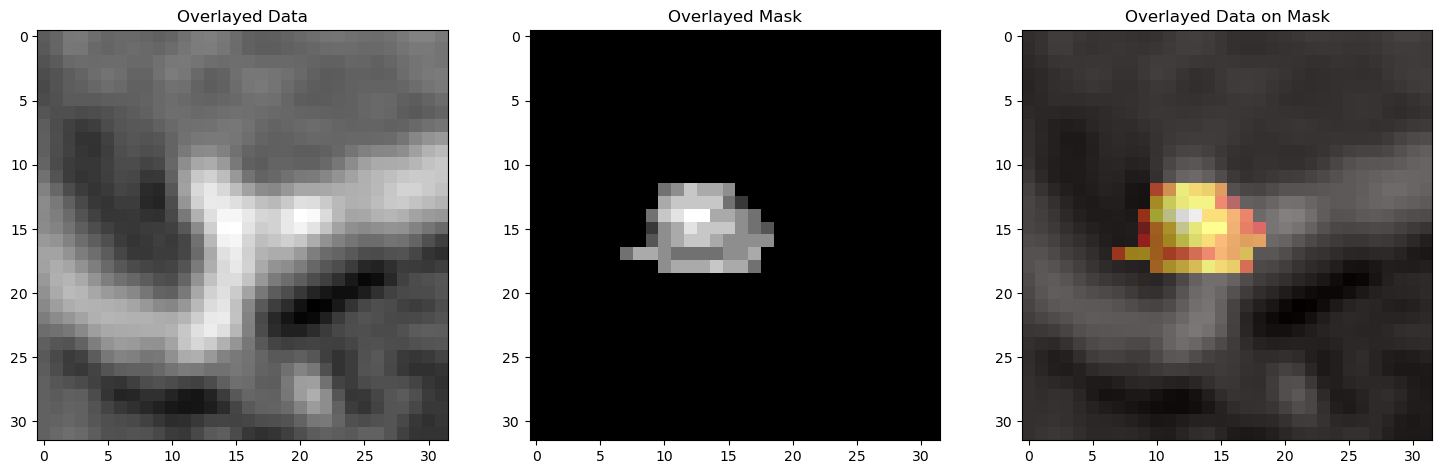

In [6]:
overlay_visualizer = OverlayVisualizer(data, mask)
overlay_visualizer.visualize_overlay()

Rotated direction:  [ 1.00000000e+00  4.77036791e-02 -2.13162821e-14  2.18574607e-14
  1.18503907e-14  9.98861531e-01  1.08229520e-14 -9.98861531e-01
 -4.77036791e-02]


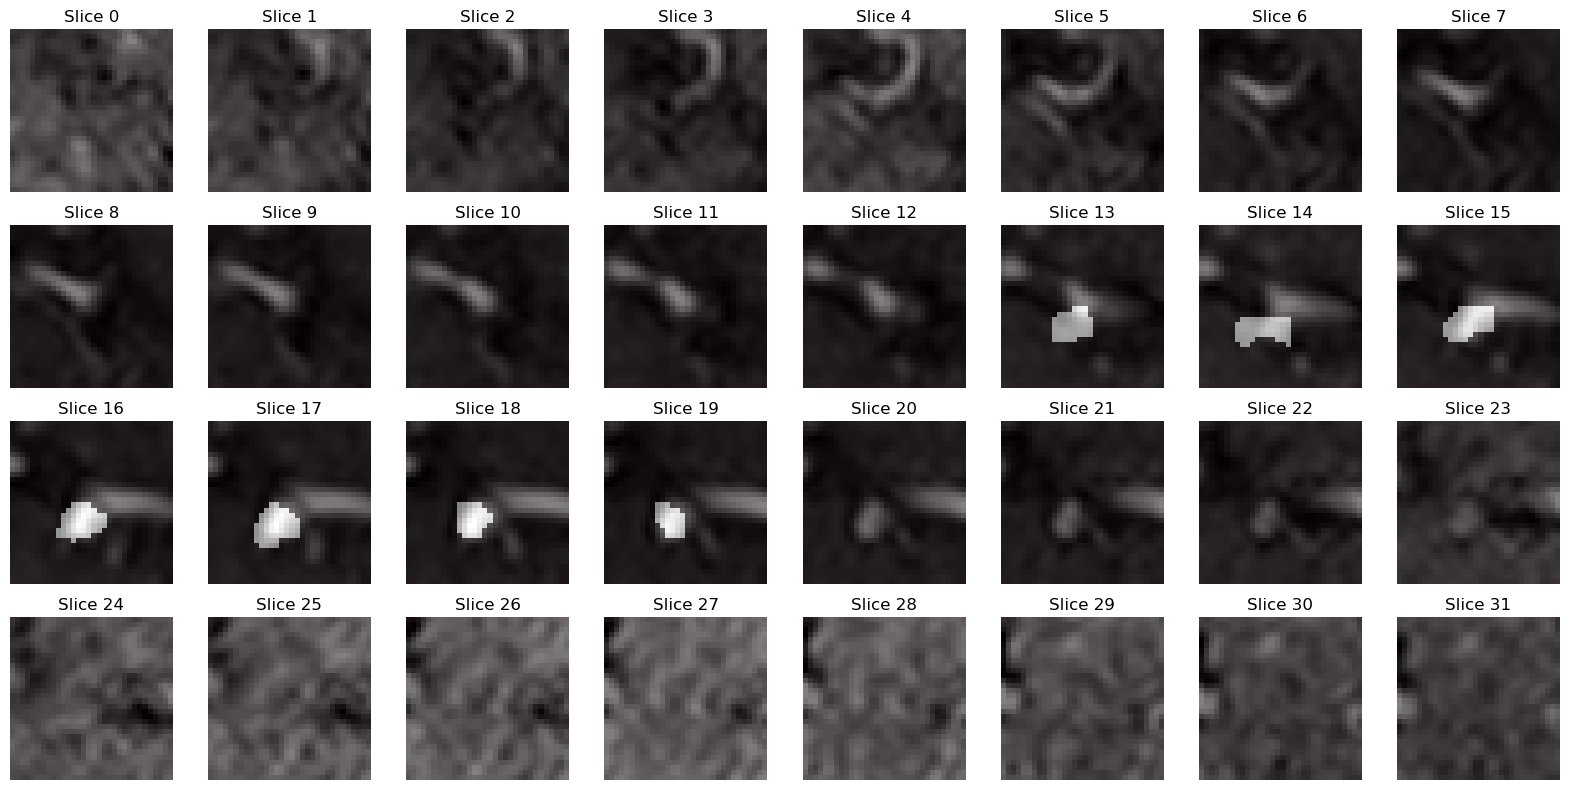

In [15]:
vessel_view = OptimizedVesselView(data, mask, direction)
vessel_view.rotate_data(angle=90)
print("Rotated direction: ", vessel_view.rotated_direction)

rotated_visualizer = SliceVisualizer(vessel_view.rotated_data, vessel_view.rotated_mask)
rotated_visualizer.show_slices(with_overlay=True)

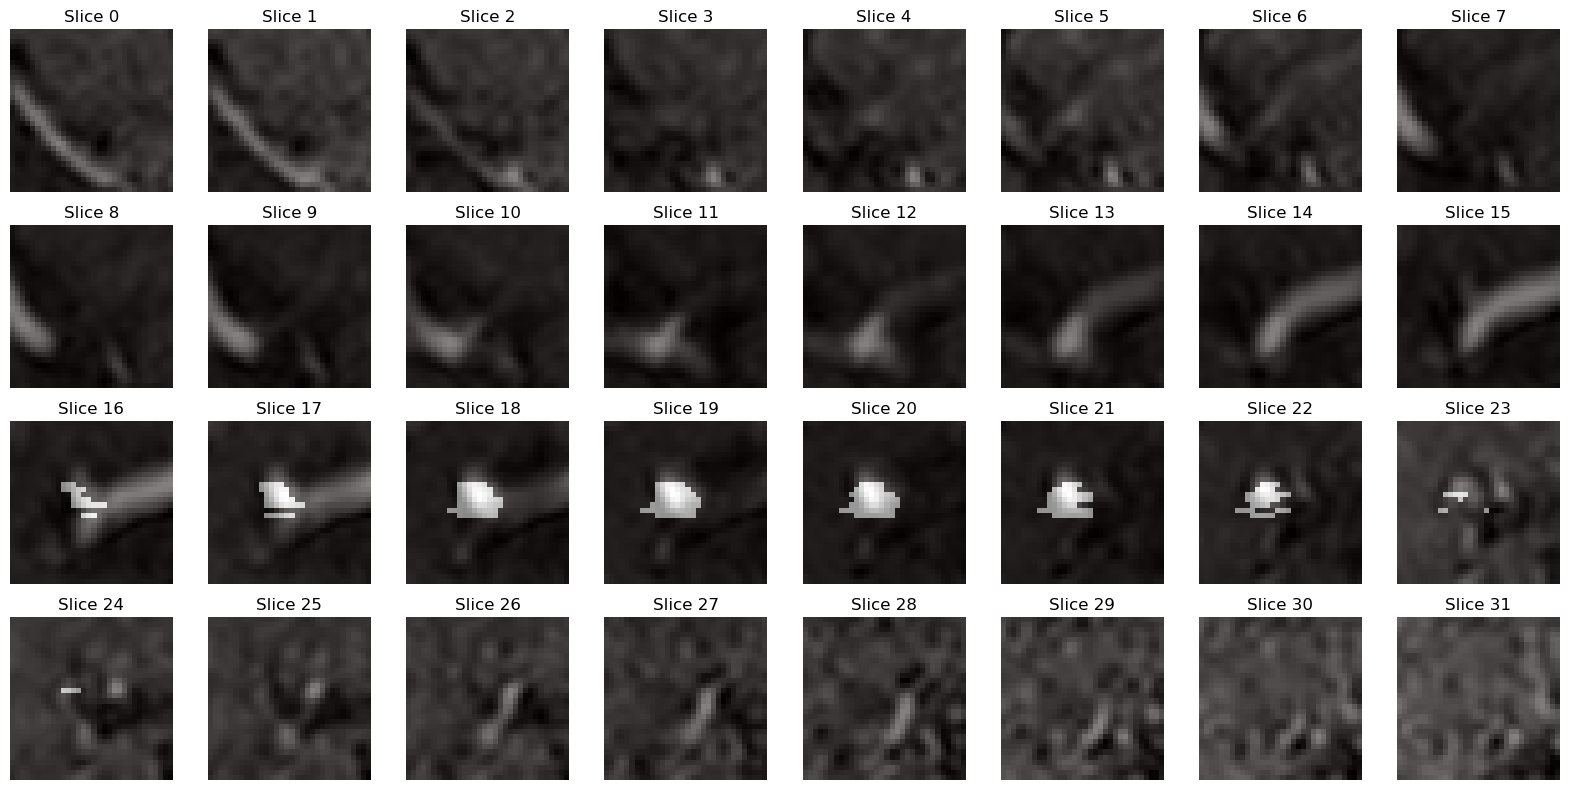

In [8]:
visualizer_rotate = SliceVisualizer(data, mask)
visualizer_rotate.show_slices(with_overlay=True)

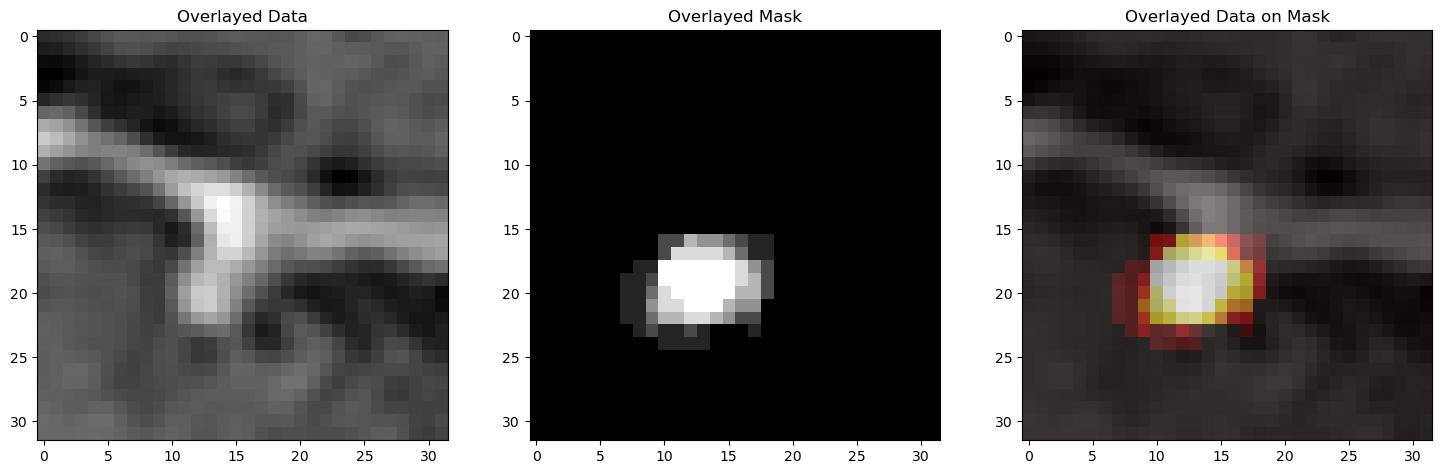

In [9]:
overlay_visualizer_rotate = OverlayVisualizer(vessel_view.rotated_data, vessel_view.rotated_mask)
overlay_visualizer_rotate.visualize_overlay()

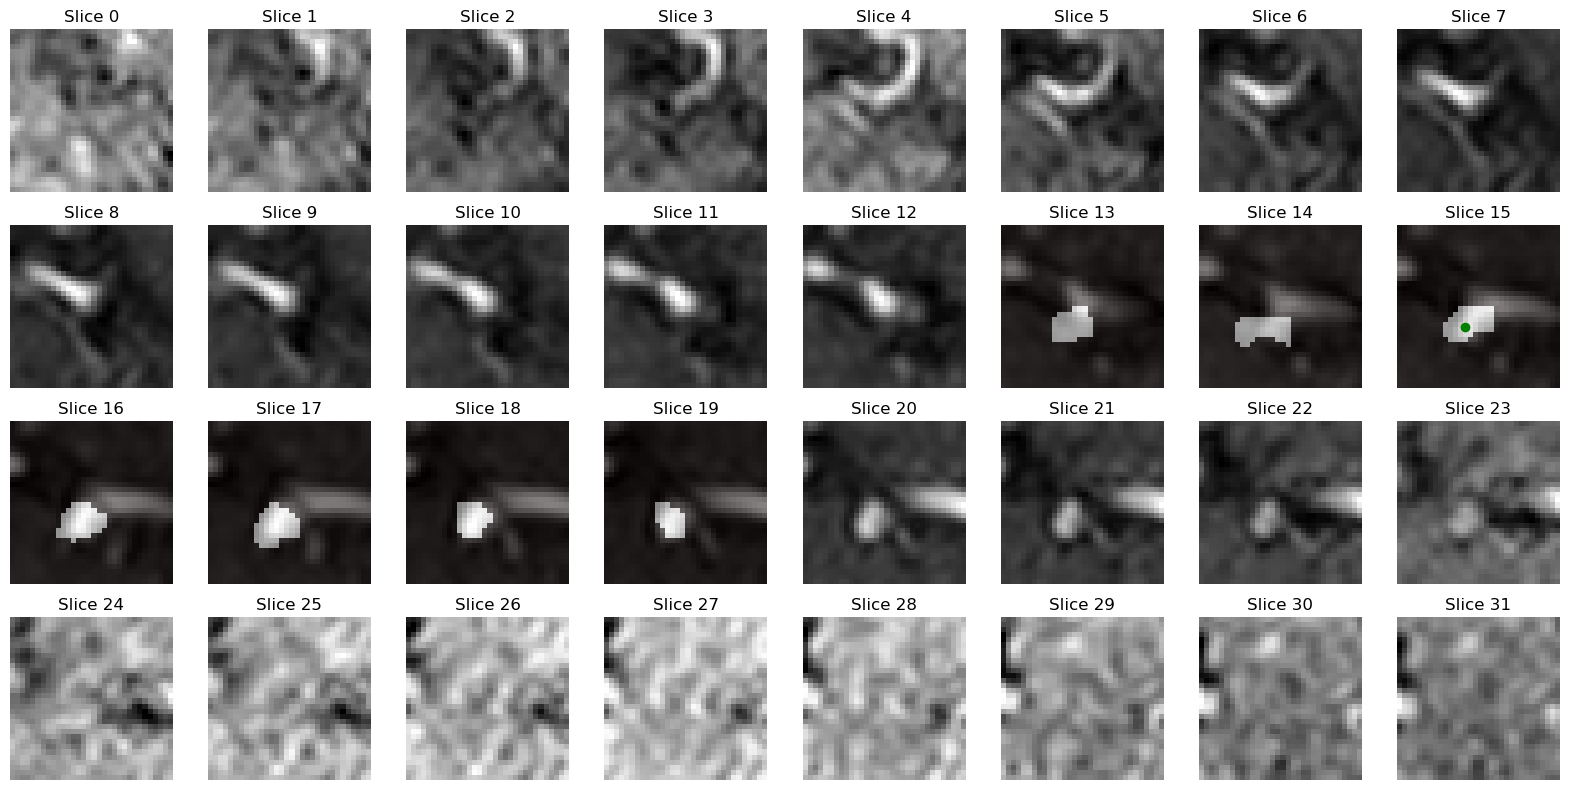

Aneurysm centroid: [15.81952663 19.40828402 12.93491124]


In [16]:
aneurysm_centroid = AneurysmCentroid(vessel_view.rotated_data, vessel_view.rotated_mask)
centroid = aneurysm_centroid.calculate_centroid()
aneurysm_centroid.show_slices_with_centroid(centroid)

print("Aneurysm centroid:", centroid)

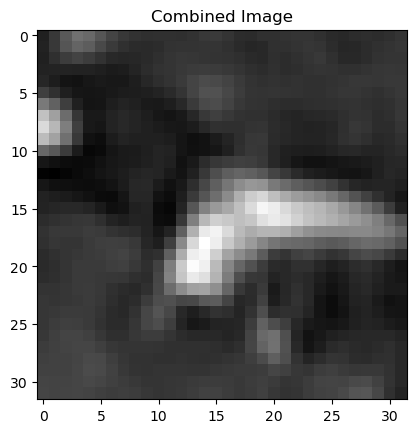

In [19]:
slice_extractor = SliceExtractor(vessel_view.rotated_data, vessel_view.rotated_mask, vessel_view.rotated_direction, centroid)
num_slices = 32
slice_thickness = 1
combined_image = slice_extractor.create_and_combine_slices(num_slices, slice_thickness)
slice_extractor.visualize_image(combined_image, "Combined Image")
